#                                     Youtube Data Analysis
### Insights through API Integration and Data Visualization

#### Import Necessary libraries

In [14]:
from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
api_key = 'your_api_key'

In [3]:
youtube = build('youtube', 'v3', developerKey=api_key)

# Data Extraction

######  - Extract video metadata (title, description, tags).

In [7]:
channel_ids = ['UCChmJrVa8kDg05JfCmxpLRw',
               'UCmLGJ3VYBcfRaWbP6JLJcpA',
               'UCnz-ZXXER4jOvuED5trXfEA',
               'UCBwmMxybNva6P_5VmxjzwqA',
               'UC8butISFwT-Wl7EV0hUK0BQ',
               'UCiT9RITQ9PW6BhXK0y2jaeg',
               'UC2UXDak6o7rBm23k3Vv5dww',
               'UC7cs8q-gJRlGwj4A8OmCmXg',
               'UCsvqVGtbbyHaMoevxPAq9Fg'
              ]

In [8]:
def get_channel_stats(youtube, channel_ids):
    
    all_data = []
    request = youtube.channels().list(
                part = 'snippet, contentDetails, statistics',
                id = ','.join(channel_ids))
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'])

        all_data.append(data)
    
    return all_data

In [10]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [17]:
channel_data.dtypes

channel_name    object
Subscribers     object
Views           object
Total_videos    object
dtype: object

In [23]:
channel_data = pd.DataFrame(channel_statistics)

In [24]:
channel_data

,channel_name,Subscribers,Views,Total_videos
0,Apna College,5570000,872763411,835
1,Ken Jee,260000,9051595,287
2,techTFQ,312000,17236988,137
3,Simplilearn,4220000,370388203,7741
4,Tina Huang,669000,31806637,229
5,Seattle Data Guy,95500,4990547,253
6,Darshil Parmar,141000,6624331,154
7,Alex The Analyst,818000,36831835,312
8,freeCodeCamp.org,9690000,735824353,1705


# Data Cleaning and Transformation

In [25]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])

In [26]:
channel_data.dtypes

channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
dtype: object

# Data Analysis and Visualization

# Identify Content Trends


#### The project uses the YouTube Data API to gather channel names, subscriber counts, view counts, and total video counts. Content trends are identified by creating a bar chart that shows each channel's name on the x-axis and its total number of videos on the y-axis. This chart quickly highlights which channels are producing more content. By studying these trends, creators and marketers can understand popular content themes and strategies that attract viewers. This helps in refining content approaches to better engage audiences and enhance performance on YouTube.

#### Plot total videos per channel

In [37]:
channel_data

,channel_name,Subscribers,Views,Total_videos,performance
0,Apna College,5570000,872763411,835,878333411
1,Ken Jee,260000,9051595,287,9311595
2,techTFQ,312000,17236988,137,17548988
3,Simplilearn,4220000,370388203,7741,374608203
4,Tina Huang,669000,31806637,229,32475637
5,Seattle Data Guy,95500,4990547,253,5086047
6,Darshil Parmar,141000,6624331,154,6765331
7,Alex The Analyst,818000,36831835,312,37649835
8,freeCodeCamp.org,9690000,735824353,1705,745514353


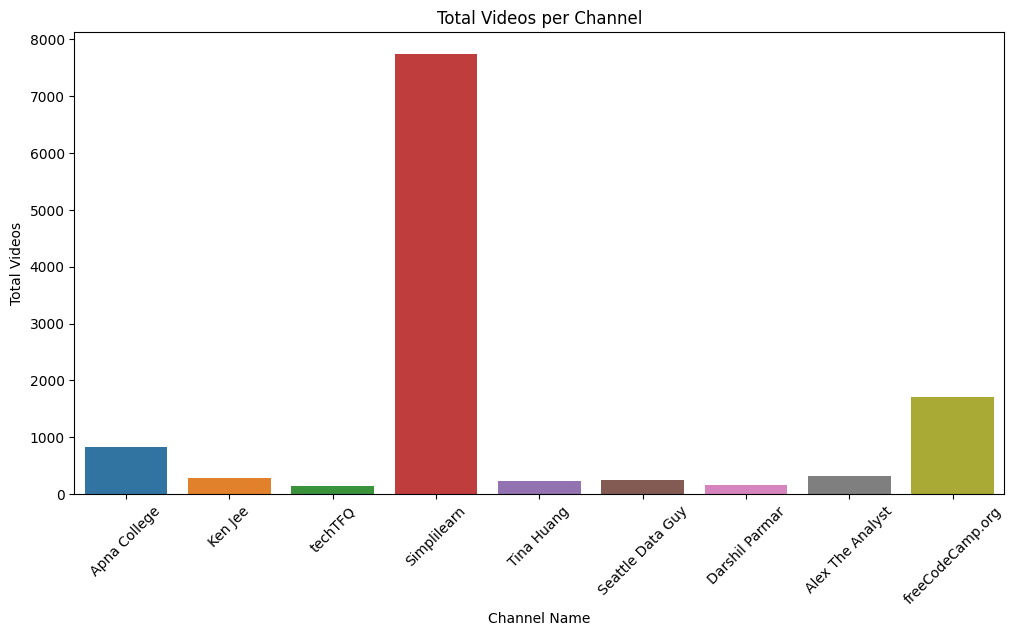

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=channel_data, x='channel_name', y='Total_videos')
plt.title('Total Videos per Channel')
plt.xlabel('Channel Name')
plt.ylabel('Total Videos')
plt.xticks(rotation=45)
plt.show()

# Understand Engagement Patterns


#### understanding engagement patterns involves visualizing the relationship between subscribers and views for each channel. The plot combines a bar chart and a line plot to display these metrics side by side.



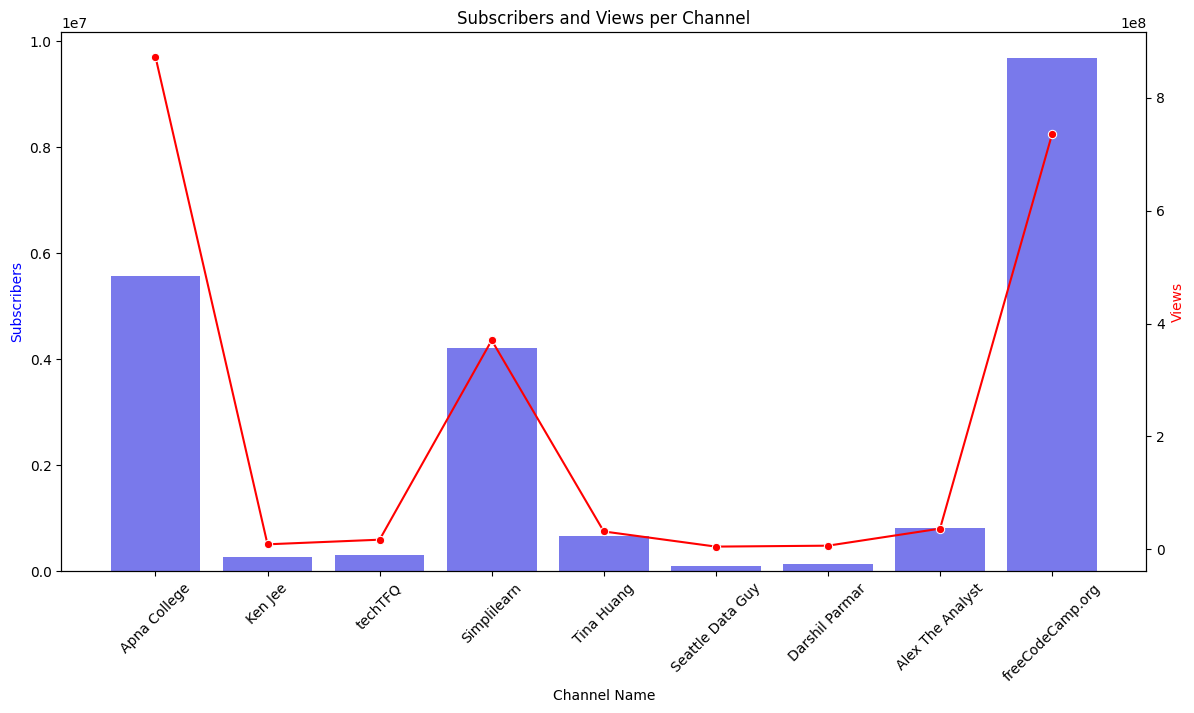

In [31]:
# Plot subscribers and views per channel
fig, ax1 = plt.subplots(figsize=(14, 7))

ax2 = ax1.twinx()
sns.barplot(data=channel_data, x='channel_name', y='Subscribers', ax=ax1, color='b', alpha=0.6)
sns.lineplot(data=channel_data, x='channel_name', y='Views', ax=ax2, color='r', marker='o')

ax1.set_xlabel('Channel Name')
ax1.set_ylabel('Subscribers', color='b')
ax2.set_ylabel('Views', color='r')
ax1.set_title('Subscribers and Views per Channel')
ax1.tick_params(axis='x', rotation=45)

plt.show()

#### Bar Chart (Subscribers): The blue bars represent the number of subscribers for each channel. This helps to identify channels with larger subscriber bases, indicating potential audience reach and loyalty.

#### Line Plot (Views): The red line with markers shows the number of views each channel has accumulated. This allows comparison against the subscriber base, highlighting channels where content resonates well with viewers.

#### By plotting subscribers and views together, creators and marketers can gauge how effectively channels convert subscribers into viewers. Channels with high engagement ratios may indicate strong content strategies that attract and retain viewership. This analysis guides strategies to enhance content engagement and optimize channel performance on YouTube.

# Evaluate Channel Performance

#### Calculate performance metric (subscribers + views)


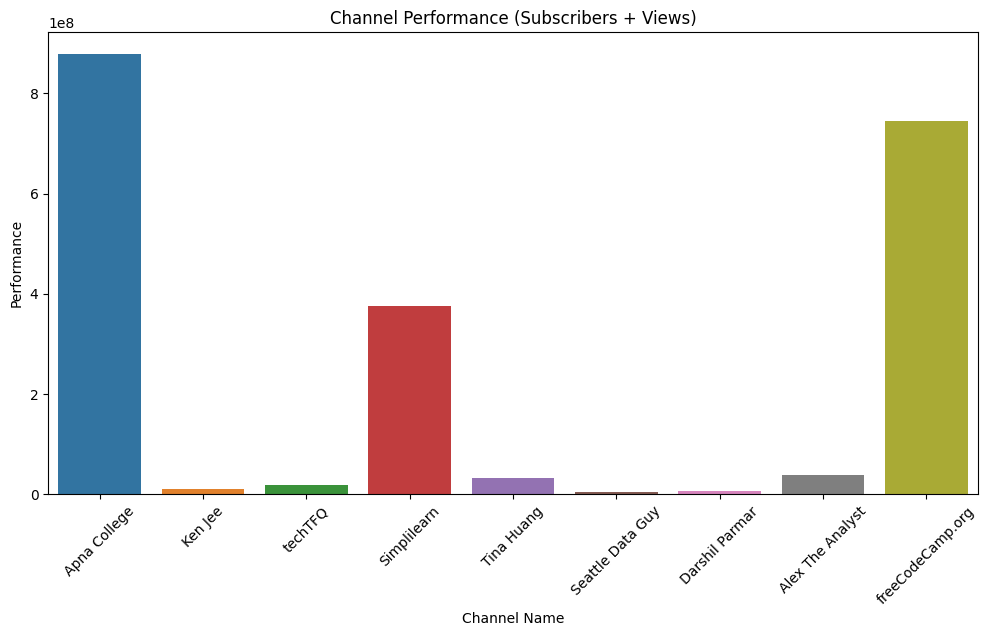

In [34]:
channel_data['performance'] = channel_data['Subscribers'] + channel_data['Views']

# Plot channel performance
plt.figure(figsize=(12, 6))
sns.barplot(data=channel_data, x='channel_name', y='performance')
plt.title('Channel Performance (Subscribers + Views)')
plt.xlabel('Channel Name')
plt.ylabel('Performance')
plt.xticks(rotation=45)
plt.show()

#### Each bar represents a channel, with its length indicating the combined metric of subscribers and views. This visualization offers a direct comparison of how channels are performing in terms of audience reach and engagement.